In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

In [2]:
iris = load_iris()
X = iris.data

In [3]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
#eps : 군집의 반경, 주어진 데이터 포인트 주변에 몇개의 데이터 포인트가 있어야
#      군집을 형성하는지 결정하는 매개변수
#(min_samples 이상이 있을 때 해당 데이터가 핵심 포인트(core point)로 간주됨)
#min_samples : 군집으로 인식하기 위한 최소 데이터 포인트 수
dbscan

DBSCAN()

In [6]:
labels = dbscan.fit_predict(X)
print(labels, type(labels))


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1] <class 'numpy.ndarray'>


{0, 1, -1}


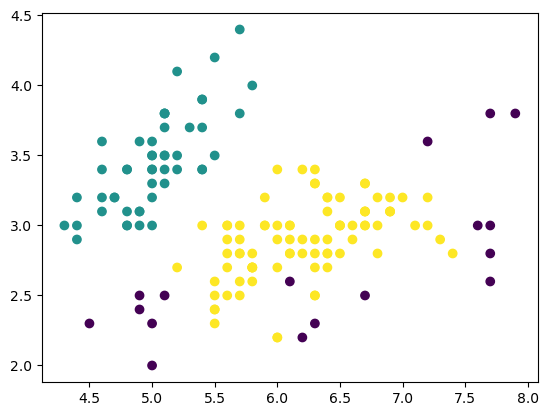

In [13]:
#시각화
unique_labels = set(labels)
print(unique_labels)

plt.scatter(X[:,0], X[:, 1], c=labels, marker='o')
plt.show()


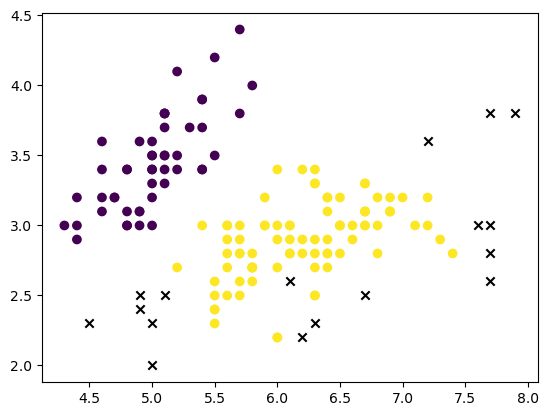

In [15]:
#노이즈 포인트 확인
noise_mask = (labels == -1)

plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c="black", marker='x', label = "noise")
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], marker = 'o', label = "cluster")
plt.show()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  19  20
  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  58  61
  63  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  88  89  90  91  92  94  95  96  97  99 101 102 103 104
 110 111 112 115 116 120 121 123 124 125 126 127 128 132 133 136 137 138
 139 140 142 143 144 145 146 147 149]


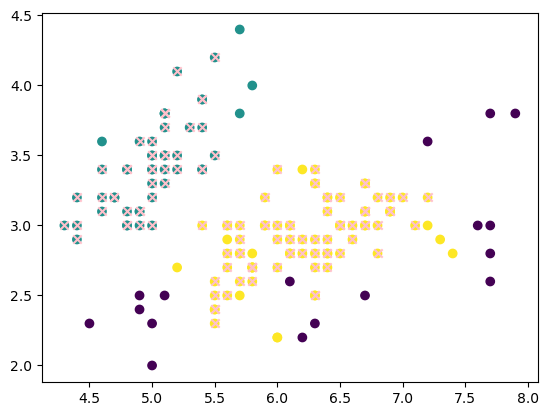

In [24]:
#핵심포인트(core point)

core_mask = np.zeros_like(labels, dtype = bool)
# print(core_mask)

#핵심 포인트의 인덱스 반환
print(dbscan.core_sample_indices_) #핵심포인트(중심점)의 인덱스
core_mask[dbscan.core_sample_indices_] = True
# print(core_mask)

plt.scatter(X[:, 0], X[:, 1], c=labels, marker = 'o')
plt.scatter(X[core_mask, 0], X[core_mask, 1], c = 'pink', marker='x', label="core point")
plt.show()